<a href="https://colab.research.google.com/github/HayateSato/Practce_KikaiGakusyu/blob/main/10%E7%AB%A0_%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%82%B7%E3%82%B9%E3%83%86%E3%83%A0%E3%81%AE%E3%82%BF%E3%82%99%E3%83%83%E3%82%B7%E3%83%A5%E3%83%9B%E3%82%99%E3%83%BC%E3%83%88%E3%82%99%E3%82%92%E4%BD%9C%E6%88%90%E3%81%99%E3%82%8B%EF%BC%91%EF%BC%90%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 下記セルを実行すると、Googleドライブへの接続を求められます。
# Googleアカウントにログインして進めてください。
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
working_dir = 'MLSys_100Knocks' #　※※自分で作成したフォルダパスが異なる場合こちらを変更してください。※※
path = f'/content/drive/MyDrive/{working_dir}/本章/10章'
os.chdir(path)
! pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 48.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=e7069b40ca6841bcf6282b1293c11711fec7bded2159b755083c67d5dec726ed
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


# １０章_機械学習システムのダッシュボードを作成する１０本ノック



### ノック９１：単一データの読み込みをしよう

In [3]:
import os
import pandas as pd
data_dir = 'data'
store_monthly_dir = os.path.join(data_dir, '01_store_monthly')
ml_base_dir = os.path.join(data_dir, '02_ml_base')

output_ml_result_dir = os.path.join(data_dir, '10_output_ml_result')
output_report_dir = os.path.join(data_dir, '11_output_report')

store_monthly_file = 'store_monthly_data.csv'
ml_base_file = 'ml_base_data.csv'

store_monthly_data = pd.read_csv(os.path.join(store_monthly_dir, store_monthly_file))
ml_base_data = pd.read_csv(os.path.join(ml_base_dir, ml_base_file))
display(store_monthly_data.head(3))
display(ml_base_data.head(3))

,store_name,order,order_fin,order_cancel,order_delivery,order_takeout,order_weekday,order_weekend,order_time_11,order_time_12,...,order_time_14,order_time_15,order_time_16,order_time_17,order_time_18,order_time_19,order_time_20,order_time_21,delta_avg,year_month
0,あきる野店,1147,945,202,841,306,844,303,91,122,...,101,95,107,106,100,108,109,96,34.110053,201904
1,さいたま南店,1504,1217,287,1105,399,1104,400,130,135,...,143,142,137,130,113,140,132,155,35.337716,201904
2,さいたま緑店,1028,847,181,756,272,756,272,95,91,...,95,102,82,90,93,95,95,84,34.291617,201904


,store_name,y_weekday,y_weekend,order,order_fin,order_cancel,order_delivery,order_takeout,order_weekday,order_weekend,...,order_time_14,order_time_15,order_time_16,order_time_17,order_time_18,order_time_19,order_time_20,order_time_21,delta_avg,year_month
0,あきる野店,1.0,0.0,1147,945,202,841,306,844,303,...,101,95,107,106,100,108,109,96,34.110053,201904
1,さいたま南店,1.0,1.0,1504,1217,287,1105,399,1104,400,...,143,142,137,130,113,140,132,155,35.337716,201904
2,さいたま緑店,1.0,1.0,1028,847,181,756,272,756,272,...,95,102,82,90,93,95,95,84,34.291617,201904


### ノック９２：機械学習モデルの精度評価結果を読み込んで結合しよう

In [4]:
ml_results_dirs = os.listdir(output_ml_result_dir)
score_all = []
for ml_results_dir in ml_results_dirs:
    score_file_path = os.path.join(output_ml_result_dir,ml_results_dir, 'score.csv')
    score_monthly = pd.read_csv(score_file_path)
    score_monthly['dirs'] = ml_results_dir
    score_all.append(score_monthly)
score_all = pd.concat(score_all,ignore_index=True)
score_all.head()
score_all.loc[:, "year_month"] = score_all.loc[:, "dirs"].str.split("_", expand=True)[1]
score_all.head()

,DataCategory,acc,f1,recall,precision,tp,fn,fp,tn,model_name,model_target,dirs,year_month
0,train,1.000000,1.000000,1.000000,1.000000,1144,0,0,903,tree,y_weekday,results_202007,202007
1,test,0.763098,0.791165,0.791165,0.791165,394,104,104,276,tree,y_weekday,results_202007,202007
2,train,1.000000,1.000000,1.000000,1.000000,1144,0,0,903,RandomForest,y_weekday,results_202007,202007
3,test,0.728929,0.762475,0.767068,0.757937,382,116,122,258,RandomForest,y_weekday,results_202007,202007
4,train,0.828530,0.845714,0.840909,0.850575,962,182,169,734,GradientBoosting,y_weekday,results_202007,202007


### ノック９３：機械学習モデルの重要変数データを読み込んで結合しよう

In [5]:
ml_results_dirs = os.listdir(output_ml_result_dir)
importance_all = []
for ml_results_dir in ml_results_dirs:
    importance_file_path = os.path.join(output_ml_result_dir,ml_results_dir, 'importance.csv')
    importance_monthly = pd.read_csv(importance_file_path)
    importance_monthly['dirs'] = ml_results_dir
    importance_all.append(importance_monthly)
importance_all = pd.concat(importance_all,ignore_index=True)
importance_all.loc[:,'year_month'] = importance_all['dirs'].str.split('_', expand=True)[1]
importance_all.head()

,cols,importance,model_name,model_target,dirs,year_month
0,order_weekday,0.323070,tree,y_weekday,results_202007,202007
1,order_weekend,0.303735,tree,y_weekday,results_202007,202007
2,order_delivery,0.032845,tree,y_weekday,results_202007,202007
3,order_time_14,0.027650,tree,y_weekday,results_202007,202007
4,order_fin,0.027326,tree,y_weekday,results_202007,202007


### ノック９４：機械学習モデルの予測結果を読み込んで結合しよう

In [6]:
report_files = os.listdir(output_report_dir)
report_all = []
for report_file in report_files:
    report_file_path = os.path.join(output_report_dir, report_file)
    report_monthly = pd.read_excel(report_file_path)
    report_monthly = report_monthly[['store_name','score_weekday','score_weekend']].copy()
    report_monthly['files'] = report_file
    report_all.append(report_monthly)
report_all = pd.concat(report_all,ignore_index=True)
report_all.head()

,store_name,score_weekday,score_weekend,files
0,あきる野店,0.567821,0.847881,report_pred_202005.xlsx
1,さいたま南店,0.099261,0.775349,report_pred_202005.xlsx
2,さいたま緑店,0.351067,0.898108,report_pred_202005.xlsx
3,さいたま西店,0.256878,0.777520,report_pred_202005.xlsx
4,つくば店,0.158105,0.792846,report_pred_202005.xlsx


In [7]:
report_all.loc[:,'pred_year_month'] = report_all['files'].str.split('.', expand=True)[0]
report_all.loc[:,'pred_year_month'] = report_all['pred_year_month'].str[12:]
report_all.head()

,store_name,score_weekday,score_weekend,files,pred_year_month
0,あきる野店,0.567821,0.847881,report_pred_202005.xlsx,202005
1,さいたま南店,0.099261,0.775349,report_pred_202005.xlsx,202005
2,さいたま緑店,0.351067,0.898108,report_pred_202005.xlsx,202005
3,さいたま西店,0.256878,0.777520,report_pred_202005.xlsx,202005
4,つくば店,0.158105,0.792846,report_pred_202005.xlsx,202005


In [8]:
ml_base_data

,store_name,y_weekday,y_weekend,order,order_fin,order_cancel,order_delivery,order_takeout,order_weekday,order_weekend,...,order_time_14,order_time_15,order_time_16,order_time_17,order_time_18,order_time_19,order_time_20,order_time_21,delta_avg,year_month
0,あきる野店,1.0,0.0,1147,945,202,841,306,844,303,...,101,95,107,106,100,108,109,96,34.110053,201904
1,さいたま南店,1.0,1.0,1504,1217,287,1105,399,1104,400,...,143,142,137,130,113,140,132,155,35.337716,201904
2,さいたま緑店,1.0,1.0,1028,847,181,756,272,756,272,...,95,102,82,90,93,95,95,84,34.291617,201904
3,さいたま西店,1.0,0.0,1184,980,204,852,332,870,314,...,117,105,112,103,112,96,108,98,34.576531,201904
4,つくば店,1.0,1.0,1267,1058,209,928,339,936,331,...,102,128,117,110,107,100,132,125,34.663516,201904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,高津店,0.0,1.0,1154,918,236,844,310,855,299,...,109,120,96,104,99,107,117,94,34.586057,202007
3116,高田馬場店,0.0,1.0,1098,903,195,816,282,811,287,...,96,97,104,112,119,110,95,103,34.995570,202007
3117,鴻巣店,0.0,1.0,1153,970,183,870,283,861,292,...,104,112,100,102,104,106,114,96,34.589691,202007
3118,鶴見店,0.0,1.0,1524,1251,273,1125,399,1128,396,...,142,135,154,124,132,137,152,141,35.081535,202007


### ノック９５：機械学習モデルの予測結果を検証するためのデータを作成しよう

In [9]:
ml_data = ml_base_data[['store_name','y_weekday', 'y_weekend','year_month']].copy()
ml_data.loc[:,'pred_year_month'] = pd.to_datetime(ml_data['year_month'], format='%Y%m')
from dateutil.relativedelta import relativedelta
ml_data.loc[:,'pred_year_month'] = ml_data['pred_year_month'].map(lambda x: x + relativedelta(months=1))
ml_data.loc[:,'pred_year_month'] = ml_data['pred_year_month'].dt.strftime('%Y%m')
del ml_data['year_month']
ml_data.head(3)

<ipython-input-9-739e980efa47>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['201905' '201905' '201905' ... '202008' '202008' '202008']' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  ml_data.loc[:,'pred_year_month'] = ml_data['pred_year_month'].dt.strftime('%Y%m')


,store_name,y_weekday,y_weekend,pred_year_month
0,あきる野店,1.0,0.0,201905
1,さいたま南店,1.0,1.0,201905
2,さいたま緑店,1.0,1.0,201905


In [10]:
report_valid = pd.merge(report_all, ml_data, on=['store_name','pred_year_month'], how='left')
report_valid

,store_name,score_weekday,score_weekend,files,pred_year_month,y_weekday,y_weekend
0,あきる野店,0.567821,0.847881,report_pred_202005.xlsx,202005,0.0,1.0
1,さいたま南店,0.099261,0.775349,report_pred_202005.xlsx,202005,0.0,1.0
2,さいたま緑店,0.351067,0.898108,report_pred_202005.xlsx,202005,0.0,1.0
3,さいたま西店,0.256878,0.777520,report_pred_202005.xlsx,202005,0.0,1.0
4,つくば店,0.158105,0.792846,report_pred_202005.xlsx,202005,0.0,1.0
...,...,...,...,...,...,...,...
970,高津店,0.934106,0.137875,report_pred_202009.xlsx,202009,NaN,NaN
971,高田馬場店,0.965103,0.123156,report_pred_202009.xlsx,202009,NaN,NaN
972,鴻巣店,0.962716,0.145759,report_pred_202009.xlsx,202009,NaN,NaN
973,鶴見店,0.946437,0.153724,report_pred_202009.xlsx,202009,NaN,NaN


In [11]:
report_valid.dropna(inplace=True)
report_valid

,store_name,score_weekday,score_weekend,files,pred_year_month,y_weekday,y_weekend
0,あきる野店,0.567821,0.847881,report_pred_202005.xlsx,202005,0.0,1.0
1,さいたま南店,0.099261,0.775349,report_pred_202005.xlsx,202005,0.0,1.0
2,さいたま緑店,0.351067,0.898108,report_pred_202005.xlsx,202005,0.0,1.0
3,さいたま西店,0.256878,0.777520,report_pred_202005.xlsx,202005,0.0,1.0
4,つくば店,0.158105,0.792846,report_pred_202005.xlsx,202005,0.0,1.0
...,...,...,...,...,...,...,...
775,高津店,0.054634,0.897747,report_pred_202008.xlsx,202008,0.0,1.0
776,高田馬場店,0.112745,0.843095,report_pred_202008.xlsx,202008,0.0,1.0
777,鴻巣店,0.101667,0.896522,report_pred_202008.xlsx,202008,0.0,1.0
778,鶴見店,0.063223,0.935516,report_pred_202008.xlsx,202008,0.0,1.0


### ノック９６：店舗分析用ダッシュボードを作成しよう

In [12]:
import seaborn as sns
from IPython.display import display, clear_output
from ipywidgets import Select, SelectMultiple
import matplotlib.pyplot as plt
import japanize_matplotlib

store_list = store_monthly_data['store_name'].unique()

def make_graph_96(val):
    clear_output()
    display(select_96)

    fig = plt.figure(figsize=(17,4))
    plt.subplots_adjust(wspace=0.25, hspace=0.6)

    for i, trg in enumerate(val['new']):
        pick_data = store_monthly_data.loc[store_monthly_data['store_name']==trg]
        graph_fin = pick_data[['store_name','order_fin', 'year_month']].copy()
        graph_fin.loc[:,'type'] = 'fin'
        graph_fin = graph_fin.rename(columns={'order_fin': 'count'})

        graph_cancel = pick_data[['store_name','order_cancel', 'year_month']].copy()
        graph_cancel.loc[:,'type'] = 'cancel'
        graph_cancel = graph_cancel.rename(columns={'order_cancel': 'count'})

        ax = fig.add_subplot(1, len(val['new']), (i+1))
        sns.pointplot(x="year_month", y="count", data=graph_fin, color='orange')
        sns.pointplot(x="year_month", y="count", data=graph_cancel, color='blue')
        ax.set_title(trg)


select_96 = SelectMultiple(options=store_list)
select_96.observe(make_graph_96, names='value')
display(select_96)

SelectMultiple(options=('あきる野店', 'さいたま南店', 'さいたま緑店', 'さいたま西店', 'つくば店', '三浦店', '三鷹店', '上尾店', '上野店', '世田谷店', '中原…

### ノック９７：機械学習モデルの精度評価ダッシュボードを作成しよう

Select(options=('tree', 'RandomForest', 'GradientBoosting'), value='tree')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

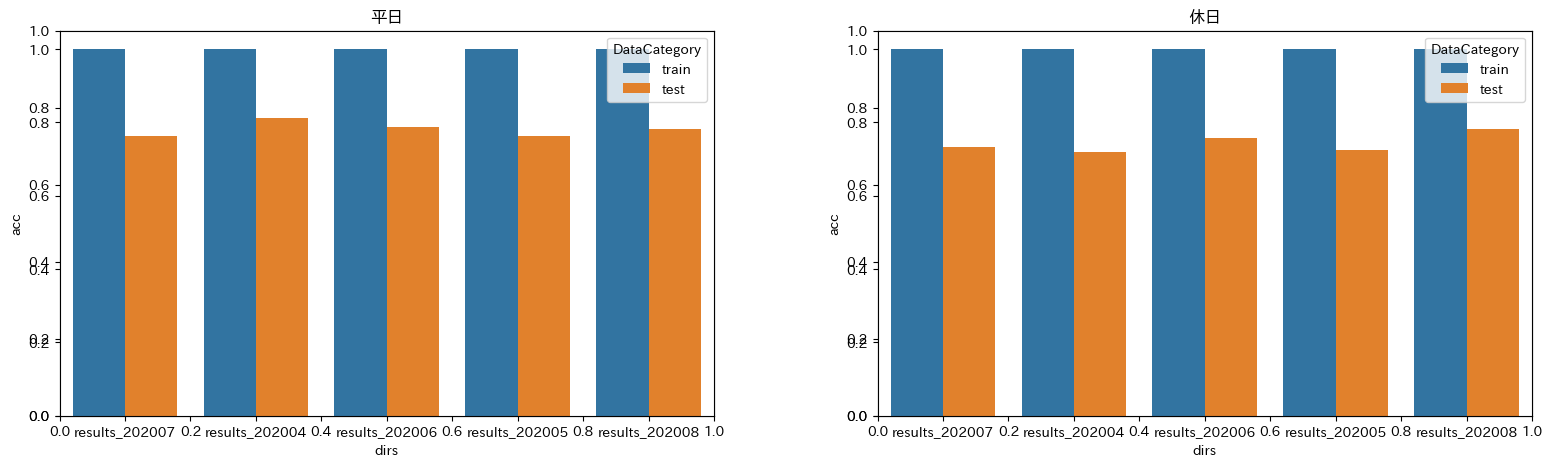

In [14]:
opt1 = ''

def s1_update_97(val):
    global opt1
    opt1 = val['new']
    graph_97()

def graph_97():
    clear_output()
    display(select1_97)

    graph_df_wd = score_all.loc[(score_all['model_name']==opt1)&(score_all['model_target']=='y_weekday')].copy()
    graph_df_we = score_all.loc[(score_all['model_name']==opt1)&(score_all['model_target']=='y_weekend')].copy()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19,5))
    plt.subplots_adjust(wspace=0.25, hspace=0.6)
    ax1 = fig.add_subplot(1, 2, 1)
    sns.barplot(x='dirs', y='acc', data=graph_df_wd, hue='DataCategory')
    ax1.set_title('平日')

    ax2 = fig.add_subplot(1, 2, 2)
    sns.barplot(x='dirs', y='acc', data=graph_df_we, hue='DataCategory')
    ax2.set_title('休日')


s1_option_97 = score_all['model_name'].unique()

select1_97 = Select(options=s1_option_97)
select1_97.observe(s1_update_97, names='value')

display(select1_97)

### ノック９８：機械学習モデルの混同行列ダッシュボードを作成しよう

### ノック９９：機械学習モデルの変数重要度の分析ダッシュボードを作成しよう

### ノック１００：機械学習モデルの予測結果検証のための可視化をしよう